In [4]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
iris = datasets.load_iris()
print('data shape is {}'.format(iris.data.shape))
print('class shape is {}'.format(iris.target.shape))

data shape is (150, 4)
class shape is (150,)


In [11]:
# use first 2 dimensions (sepal length and sepal width) of as features used to classify the flowers
X = iris.data[:, :2]
y = iris.target

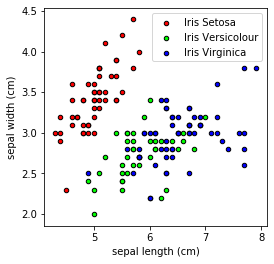

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
iris = datasets.load_iris()
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000',  '#00FF00', '#0000FF'])

K = 3
x = X[-1]

fig, ax = plt.subplots(figsize=(4,4))
for i, iris_class in enumerate(['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']):
    idx = y==i
    ax.scatter(X[idx,0], X[idx,1], 
               c=cmap_bold.colors[i], edgecolor='k', 
               s=20, label=iris_class);
ax.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)')
ax.legend();

In [8]:
import sklearn.model_selection
def pairwise_distance_matrix(X, Y):
    #Compute the pairwise distance between rows of X and rows of Y
    N, D = X.shape
    M, _ = Y.reshape(-1,D).shape 
    distance_matrix = sklearn.metrics.pairwise_distances(X,Y,metric='euclidean')
    return distance_matrix

In [9]:
def KNN(k, X, y, x):
    x = x.reshape(1, -1) if len(x.shape) == 1 else x
    """K nearest neighbors
    k: number of nearest neighbors
    X: training input locations
    y: training labels
    x: test input
    """
    N, D = X.shape
    num_classes = len(np.unique(y))
    dist = pairwise_distance_matrix(X,x)
    ypred = np.zeros(num_classes)
    classes = y[np.argsort(dist, axis=0)][:k]
        ypred[c] =  (classes==c).sum()  
    return np.argmax(ypred)

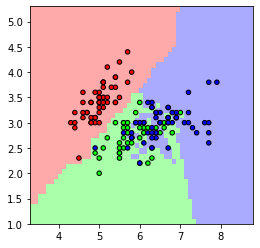

In [10]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

ypred = []
for data in np.array([xx.ravel(), yy.ravel()]).T:
    ypred.append(KNN(K, X, y, data.reshape(1,2)))

fig, ax = plt.subplots(figsize=(4,4))

ax.pcolormesh(xx, yy, np.array(ypred).reshape(xx.shape), cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20);